# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
cities

['rikitea',
 'bytosh',
 'tuktoyaktuk',
 'fereydun kenar',
 'bethel',
 'bredasdorp',
 'xinyu',
 'yunhe',
 'guerrero negro',
 'lerwick',
 'pangnirtung',
 'yerbogachen',
 'mandalgovi',
 'harper',
 'palauig',
 'ushuaia',
 'laguna',
 'barentsburg',
 'manokwari',
 'ende',
 'mehran',
 'jamestown',
 'saldanha',
 'flinders',
 'kaabong',
 'khatanga',
 'airai',
 'vao',
 'nadym',
 'avarua',
 'qaanaaq',
 'emerald',
 'bengkulu',
 'korla',
 'launceston',
 'kapaa',
 'castro',
 'hermanus',
 'busselton',
 'victoria',
 'sechura',
 'shingu',
 'murmashi',
 'pa sang',
 'ilulissat',
 'faanui',
 'albany',
 'vaitupu',
 'carnarvon',
 'galle',
 'hobyo',
 'saint-augustin',
 'sao felix do xingu',
 'mataura',
 'mae chan',
 'tasiilaq',
 'souillac',
 'gravdal',
 'tonj',
 'portland',
 'lanquin',
 'new norfolk',
 'port elizabeth',
 'daru',
 'tiksi',
 'palmer',
 'torbay',
 'salinopolis',
 'hilo',
 'wagrowiec',
 'zhigansk',
 'marawi',
 'hithadhoo',
 'whitehorse',
 'barvinkove',
 'ulsteinvik',
 'taolanaro',
 'clyde river'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = "7d1f82317baf8f613942c1b0f6e6a46f"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_data = []


counter = 1

for city in cities:
    
    city_url = url + "&q=" + city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
    pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 | rikitea
Processing Record 2 | bytosh
Processing Record 3 | tuktoyaktuk
Processing Record 4 | fereydun kenar
Processing Record 5 | bethel
Processing Record 6 | bredasdorp
Processing Record 7 | xinyu
Processing Record 8 | yunhe
Processing Record 9 | guerrero negro
Processing Record 10 | lerwick
Processing Record 11 | pangnirtung
Processing Record 12 | yerbogachen
Processing Record 13 | mandalgovi
Processing Record 14 | harper
Processing Record 15 | palauig
Processing Record 16 | ushuaia
Processing Record 17 | laguna
Processing Record 18 | barentsburg
City barentsburg not found. Skipping to next city.
Processing Record 19 | manokwari
Processing Record 20 | ende
Processing Record 21 | mehran
Processing Record 22 | jamestown
Processing Record 23 | saldanha
Processing Record 24 | flinders
Processing Record 25 | kaabong
Processing Record 26 | khatanga
Processing Record 27 | airai
Processing Record 28 | vao
Processing Record 29 | nadym
Processing Record 30 | avarua
Proces

Processing Record 233 | bac lieu
Processing Record 234 | pacific grove
Processing Record 235 | san antonio
Processing Record 236 | misratah
Processing Record 237 | maldonado
Processing Record 238 | ercis
Processing Record 239 | severo-kurilsk
Processing Record 240 | taluya
Processing Record 241 | kudahuvadhoo
Processing Record 242 | ribeira grande
Processing Record 243 | sorong
Processing Record 244 | linxia
Processing Record 245 | opuwo
Processing Record 246 | luganville
Processing Record 247 | sebina
Processing Record 248 | seoul
Processing Record 249 | manicore
Processing Record 250 | anloga
Processing Record 251 | pavilosta
Processing Record 252 | matara
Processing Record 253 | chuy
Processing Record 254 | akyab
Processing Record 255 | santa fe
Processing Record 256 | san patricio
Processing Record 257 | ballymena
Processing Record 258 | nome
Processing Record 259 | dzhusaly
City dzhusaly not found. Skipping to next city.
Processing Record 260 | nykoping
Processing Record 261 | imb

City buqayq not found. Skipping to next city.
Processing Record 456 | zimovniki
Processing Record 457 | dagda
Processing Record 458 | ostrovnoy
Processing Record 459 | lata
Processing Record 460 | murray bridge
Processing Record 461 | emba
Processing Record 462 | okakarara
Processing Record 463 | tecoanapa
Processing Record 464 | saint-pierre
Processing Record 465 | nishihara
Processing Record 466 | tanete
Processing Record 467 | yefira
City yefira not found. Skipping to next city.
Processing Record 468 | paamiut
Processing Record 469 | ferrol
Processing Record 470 | kalemie
Processing Record 471 | avera
Processing Record 472 | areka
Processing Record 473 | ballina
Processing Record 474 | tabou
Processing Record 475 | san cristobal
Processing Record 476 | guapiles
Processing Record 477 | cayenne
Processing Record 478 | tupik
Processing Record 479 | visby
Processing Record 480 | matay
Processing Record 481 | samarai
Processing Record 482 | huarmey
Processing Record 483 | kazalinsk
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(city_data)
weather_df.to_csv(output_data_file)

In [6]:
weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,76.86,65,53,5.21,PF,1587144180
1,bytosh,53.82,34.09,36.66,74,88,6.67,RU,1587144180
2,tuktoyaktuk,69.45,-133.04,14.00,85,90,6.93,CA,1587144181
3,fereydun kenar,36.69,52.52,51.80,87,40,2.24,IR,1587144181
4,bethel,41.37,-73.41,48.99,33,1,14.99,US,1587144181


In [7]:
weather_cities = pd.read_csv("weathercsv.csv")
weather_cities.head()

,Cities,Latitude,Temp,Humidity,Windspeed,Cloudiness
0,saskylakh,71.97,-2.59,90,2.57,80
1,cape town,-33.93,17.00,88,6.20,20
2,lazaro cardenas,28.39,26.00,26,2.07,20
3,yellowknife,62.45,1.00,69,2.10,90
4,saint-philippe,45.36,15.80,93,6.70,90


In [8]:
cities_weather = pd.read_csv("cities.csv")
cities_weather.head()

,Unnamed: 0,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,rikitea,-23.12,-134.97,76.86,65,53,5.21,PF,1587144180
1,1,bytosh,53.82,34.09,36.66,74,88,6.67,RU,1587144180
2,2,tuktoyaktuk,69.45,-133.04,14.00,85,90,6.93,CA,1587144181
3,3,fereydun kenar,36.69,52.52,51.80,87,40,2.24,IR,1587144181
4,4,bethel,41.37,-73.41,48.99,33,1,14.99,US,1587144181


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

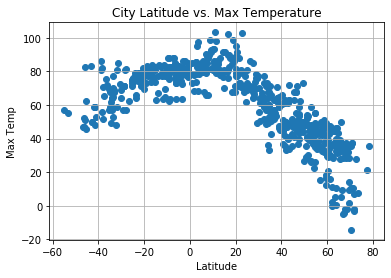

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(cities_weather["Lat"], cities_weather["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temperature")
plt.show()
plt.savefig("MaxTemperature.png")

#### Latitude vs. Humidity Plot

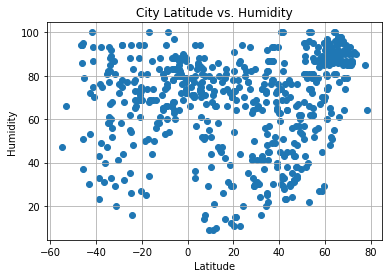

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(cities_weather["Lat"], cities_weather["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.show()
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

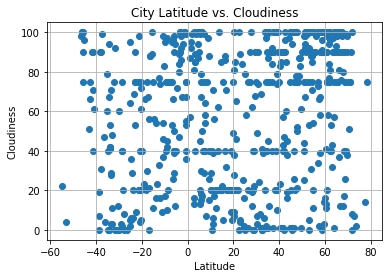

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(cities_weather["Lat"], cities_weather["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.show()
plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

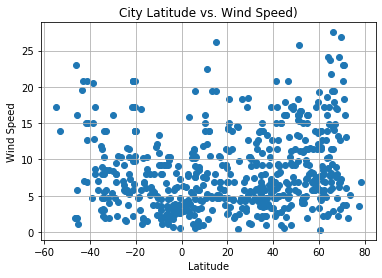

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(cities_weather["Lat"], cities_weather["Wind Speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed)")
plt.show()
plt.savefig("Windspeed.png")

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[(weather_df["Lat"]>=0)]
south_df = weather_df.loc[(weather_df["Lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
x_val = north_df["Lat"]
y_val = north_df["Max Temp"]

In [15]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_val, y_val)
vc_fit = vc_slope * x_val + vc_int

The R sq value is -0.8774393033806125.
The line equation is (y= -0.9960228735795834x + 94.22374892373773).


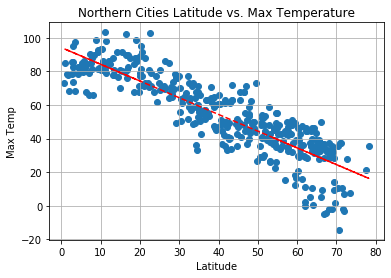

In [16]:
plt.scatter(x_val, y_val)
plt.plot(x_val, vc_fit,"--", color = "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Cities Latitude vs. Max Temperature")
print(f"The R sq value is {vc_r}.")
print(f"The line equation is (y= {vc_slope}x + {vc_int}).")
plt.savefig("NorthTemperatureRegs.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
x_val = south_df["Lat"]
y_val = south_df["Max Temp"]

In [18]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_val, y_val)
vc_fit = vc_slope * x_val + vc_int

The R sq value is 0.6605210974437603.
The line equation is (y= 0.4970317177444498x + 83.10360633793026).


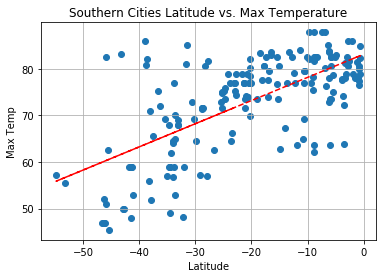

In [19]:
plt.scatter(x_val, y_val)
plt.plot(x_val, vc_fit,"--", color = "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Cities Latitude vs. Max Temperature")
print(f"The R sq value is {vc_r}.")
print(f"The line equation is (y= {vc_slope}x + {vc_int}).")
plt.savefig("SouthTemperatureRegs.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [20]:
x_val = north_df["Lat"]
y_val = north_df["Humidity"]

In [21]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_val, y_val)
vc_fit = vc_slope * x_val + vc_int

The R sq value is 0.30782714015340756.
The line equation is (y= 0.3417698947109x + 53.09225167404283).


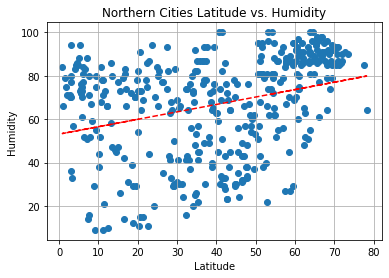

In [22]:
plt.scatter(x_val, y_val)
plt.plot(x_val, vc_fit,"--", color = "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Cities Latitude vs. Humidity")
print(f"The R sq value is {vc_r}.")
print(f"The line equation is (y= {vc_slope}x + {vc_int}).")
plt.savefig("NorthHumidityRegs.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
x_val = south_df["Lat"]
y_val = south_df["Humidity"]

In [24]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_val, y_val)
vc_fit = vc_slope * x_val + vc_int

The R sq value is 0.21748074611694992.
The line equation is (y= 0.2882344307953902x + 76.10258273672783).


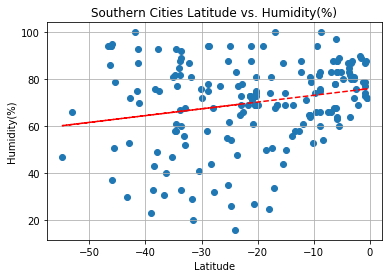

In [25]:
plt.scatter(x_val, y_val)
plt.plot(x_val, vc_fit,"--", color = "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Southern Cities Latitude vs. Humidity(%)")
print(f"The R sq value is {vc_r}.")
print(f"The line equation is (y= {vc_slope}x + {vc_int}).")
plt.savefig("SouthHumidityRegs.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,76.86,65,53,5.21,PF,1587144180
1,bytosh,53.82,34.09,36.66,74,88,6.67,RU,1587144180
2,tuktoyaktuk,69.45,-133.04,14.00,85,90,6.93,CA,1587144181
3,fereydun kenar,36.69,52.52,51.80,87,40,2.24,IR,1587144181
4,bethel,41.37,-73.41,48.99,33,1,14.99,US,1587144181


In [27]:
x_val = north_df["Lat"]
y_val = north_df["Cloudiness"]

In [28]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_val, y_val)
vc_fit = vc_slope * x_val + vc_int

The R sq value is 0.2136494442391943.
The line equation is (y= 0.3648995414314599x + 43.71730902063982).


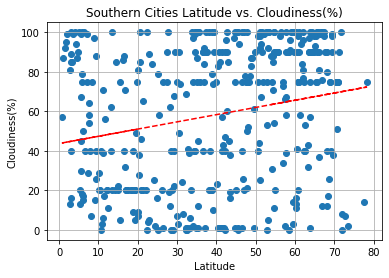

In [29]:
plt.scatter(x_val, y_val)
plt.plot(x_val, vc_fit,"--", color = "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Southern Cities Latitude vs. Cloudiness(%)")
print(f"The R sq value is {vc_r}.")
print(f"The line equation is (y= {vc_slope}x + {vc_int}).")
plt.savefig("SouthCloudinessRegs.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
x_val = south_df["Lat"]
y_val = south_df["Cloudiness"]

In [31]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_val, y_val)
vc_fit = vc_slope * x_val + vc_int

The R sq value is 0.1876027911400591.
The line equation is (y= 0.4491477730838241x + 61.7386849940564).


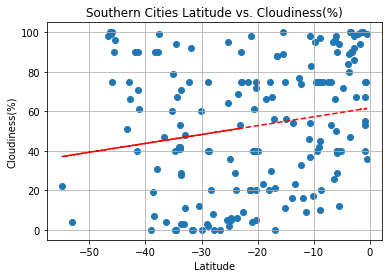

In [32]:
plt.scatter(x_val, y_val)
plt.plot(x_val, vc_fit,"--", color = "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Southern Cities Latitude vs. Cloudiness(%)")
print(f"The R sq value is {vc_r}.")
print(f"The line equation is (y= {vc_slope}x + {vc_int}).")
plt.savefig("SouthCloudinessRegs.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
x_val = north_df["Lat"]
y_val = north_df["Wind Speed"]

In [34]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_val, y_val)
vc_fit = vc_slope * x_val + vc_int

The R sq value is 0.23824039007038447.
The line equation is (y= 0.06280641305761128x + 6.448652185776707).


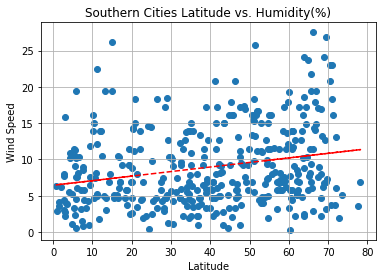

In [35]:
plt.scatter(x_val, y_val)
plt.plot(x_val, vc_fit,"--", color = "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Cities Latitude vs. Humidity(%)")
print(f"The R sq value is {vc_r}.")
print(f"The line equation is (y= {vc_slope}x + {vc_int}).")
plt.savefig("SouthWindSpeedRegs.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
x_val = south_df["Lat"]
y_val = south_df["Wind Speed"]

In [37]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_val, y_val)
vc_fit = vc_slope * x_val + vc_int

The R sq value is -0.36492020663536795.
The line equation is (y= -0.1378433147633958x + 4.668580513931869).


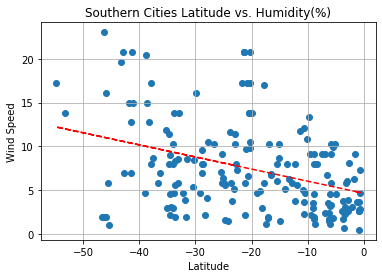

In [38]:
plt.scatter(x_val, y_val)
plt.plot(x_val, vc_fit,"--", color = "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Cities Latitude vs. Humidity(%)")
print(f"The R sq value is {vc_r}.")
print(f"The line equation is (y= {vc_slope}x + {vc_int}).")
plt.savefig("SouthWindSpeedRegs.png")
plt.show()